## Lead Scoring Case Study

**Problem Statement**<br>

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals and Objectives**<br>
There are quite a few goals for this case study.
<ul>
    
<li>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
<li>There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

The steps are broadly:
<ol>
<li> Read the data
<li>Fix Data Quality Issues
<li>Check for missing values in the data
<li>Visualize the data - Univariate, Bi-Variate (Cat-Num, Cat-Cat, Num-Num) & Multivariate
<li>Outlier detection and treatment
<li>Prepare the data for modelling
    <ul>
    <li> Dummy Variables
    <li> Scaling
    </ul>        
<li>Modelling
<ul>    </ul>
</ol>

# 1. Read and Inspect the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from math import isnan

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# read the dataset
leads_df = pd.read_csv("Leads.csv", sep=",")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads_df.shape

(9240, 37)

In [6]:
# basics of the df
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Fix Data Quality Issues

In [8]:
leads_df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

<div class="alert alert-block alert-success">
Columns with just 1 value will not impact the analysis or the model, so removing the below columns:
        <ul>
            <li>Magazine                                            1
            <li>Update me on Supply Chain Content                   1
            <li>Receive More Updates About Our Courses              1
            <li>Get updates on DM Content                           1
            <li>I agree to pay the amount through cheque            1
        </ul>
</div>

In [9]:
leads_df.drop(['Magazine',
               'Update me on Supply Chain Content',
               'Receive More Updates About Our Courses',
               'Get updates on DM Content',
               'I agree to pay the amount through cheque'],axis=1, inplace=True)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
leads_df.shape

(9240, 32)

In [11]:
# Check values of categorical columns
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            print(i)
            print(leads_df[i].value_counts())
            print("\n")

Prospect ID
37c5af8c-025c-415b-8ab5-87fd29eb1a25    1
6c38d823-a0fb-461a-ba70-6e69265340fd    1
2f091900-253a-4336-a4cc-62287401571c    1
fc3fcaf5-cb74-433b-b468-e44112a36267    1
a7b1d408-59df-4e07-a6ef-512c8d1d2721    1
                                       ..
3159731c-75a8-4e71-a1e5-9f5bd663b795    1
01768ee7-afec-47ac-9a98-018b9961de5e    1
f33166e8-d8d3-4e8c-b9d0-8a1922c35910    1
007c3194-d60e-4a31-a00e-98f93c94bda3    1
68481952-12e9-49ec-a3f1-07cae6ac740f    1
Name: Prospect ID, Length: 9240, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5


<div class="alert alert-block alert-success">
            Removing the below column as it is ID column and has unique values
            <ul>
                <li>Prospect ID
           </ul>
</div>

In [12]:
# Dropping Prospect ID column as it has unique values for all records

leads_df.drop(['Prospect ID'], inplace=True, axis=1)

<div class="alert alert-block alert-success">
            Below columns have something like 'Select' as a value for the column which means the data is not available. <br>Replacing with NaN for now and will handle in next segment
            <ul>
                <li>Specialization
                <li>How did you hear about X Education
                <li>City
                <li>Lead Profile
            </ul>
</div>

In [13]:
leads_df.replace('select',np.nan,inplace=True)
leads_df.replace('Select',np.nan,inplace=True)

# 3. Checking & Handling for Missing Values

In [14]:
# missing values
missing_df=round(100*(leads_df.isnull().sum())/len(leads_df), 2).sort_values(ascending=False)
missing_df=missing_df.to_frame()
missing_df.reset_index(inplace=True)
missing_df.columns=['columns','missing']
missing_df.head(10)

,columns,missing
0,How did you hear about X Education,78.46
1,Lead Profile,74.19
2,Lead Quality,51.59
3,Asymmetrique Profile Score,45.65
4,Asymmetrique Activity Score,45.65
5,Asymmetrique Profile Index,45.65
6,Asymmetrique Activity Index,45.65
7,City,39.71
8,Specialization,36.58
9,Tags,36.29


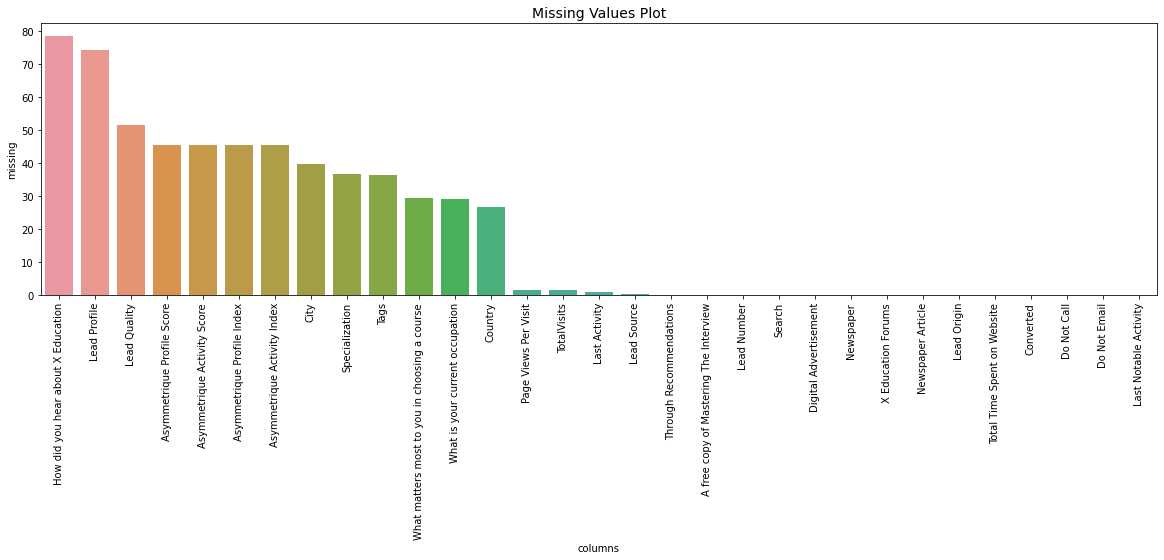

In [15]:
plt.figure(figsize=[20,5])
a=sns.barplot(x=missing_df['columns'],y=missing_df['missing'])
plt.title("Missing Values Plot", fontdict={'fontsize':14})
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
            Removing columns that have more than 40% missing values and also these columns are generated by Sales Team & do not come from Source system so we need not have them in the model.
            <ul>
            <li> How did you hear about X Education               78.46
            <li> Lead Profile                                     74.19
            <li> Lead Quality                                     51.59
            <li> Asymmetrique Profile Score                       45.65
            <li> Asymmetrique Activity Score                      45.65
            <li> Asymmetrique Profile Index                       45.65
            <li> Asymmetrique Activity Index                      45.65
        </ul>

</div>

In [16]:
leads_df.drop(['Asymmetrique Profile Index',
               'Asymmetrique Activity Index',
               'Asymmetrique Activity Score',
               'Asymmetrique Profile Score',
               'Lead Quality',
               'Lead Profile',
               'How did you hear about X Education'],axis=1, inplace=True)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [17]:
# missing values
round(100*(leads_df.isnull().sum())/len(leads_df), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

<div class="alert alert-block alert-success">
            <b>To handle the null values further, we update the values as 'Not Provided' for the categorical columns where ever they have missing values</b>
            <ul>
            <li>City                                             39.71    
            <li>Tags                                             36.29
            <li>Specialization                                   36.58
            <li>What matters most to you in choosing a course    29.32
            <li>What is your current occupation                  29.11
            <li>Country                                          26.63
        </ul>
</div>

In [18]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna('not provided')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('not provided')
leads_df['Country'] = leads_df['Country'].fillna('not provided')
leads_df['Specialization'] = leads_df['Specialization'].fillna('not provided')
leads_df['City'] = leads_df['City'].fillna('not provided')
leads_df['Tags'] = leads_df['Tags'].fillna('not provided')
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [19]:
# missing values
round(100*(leads_df.isnull().sum())/len(leads_df), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Number                                      0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
City                                             0.00
Tags                                             0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Lead Origin                                      0.00
Specialization                                   0.00
Country                     

<div class="alert alert-block alert-success">
            Remaining below columns have very less percentage of null values. 
            <ul>
            <li>TotalVisits                                      1.48
            <li>Page Views Per Visit                             1.48
            <li>Last Activity                                    1.11
            <li>Lead Source                                      0.39
        </ul>
    <b>So, let us drop these records as we have good amount of data even after removing it</b>
</div>

In [20]:
leads_df.shape

(9240, 24)

##### Check Percentage loss of data if these records are removed

In [21]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leads_df.isnull().sum(axis=1) > 1)/leads_df.shape[0]),2)

1.48

In [22]:
leads_df=leads_df[leads_df.isnull().sum(axis=1)<1]

In [23]:
#Percentage records remaining after removing

leads_df.shape[0]/9240*100

98.2034632034632

##### Only 1.48% loss of records and 98.2% records are retained after null value records are removed

In [24]:
# missing values
round(100*(leads_df.isnull().sum())/len(leads_df), 2).sort_values(ascending=False)

Lead Number                                      0.0
Lead Origin                                      0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [25]:
leads_df.shape

(9074, 24)

In [26]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

#### Before proceeding, let us check the Categorical columns value counts in percentage once more

In [27]:
# Check values of categorical columns
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            print(i)
            print(leads_df[i].value_counts(normalize=True))
            print("\n")

Lead Origin
Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64


Lead Source
Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Live Chat            0.000220
Social Media         0.000220
welearnblog_Home     0.000110
youtubechannel       0.000110
Pay per Click Ads    0.000110
NC_EDM               0.000110
WeLearn              0.000110
blog                 0.000110
testone              0.000110
Name: Lead Source, dtype: float64


Do Not Email
No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64


Do Not Call
No     0.99978
Yes    0.00022
Name: 

#### We can see that the below columns have so many values/categories which hold very less percentage of entire data

<ul>
    <li> Lead Source
    <li> Specialization    
    <li> Country
    <li> City    
</ul>

<b> Let us combine the least percentage/ Low frequency categories into one single category, so that we have lesser dummy variables and easy to interprete model
  


- Lead Source: Google, Direct Traffic, Olark Chat, Organic Search, and Reference have high frequency. The rest shall be clubbed as 'Other Sources'.

In [28]:
leads_df['Lead Source'] = leads_df['Lead Source'].apply(lambda x: 'Google' if x=='Google' 
                                             else('Direct Traffic' if x=='Direct Traffic'
                                                  else ('Olark Chat' if x =='Olark Chat'
                                                       else ('Organic Search' if x =='Organic Search'
                                                            else ('Reference' if x=='Reference'
                                                                 else 'Other Sources')))))
leads_df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Other Sources      313
Name: Lead Source, dtype: int64

- Specialization: Finance Management, not provided, Human Resource Management, Marketing Management, and Operations Management have high frequency. The rest shall be clubbed as 'Others'.

In [29]:
leads_df['Specialization'] = leads_df.Specialization.apply(lambda x: 'Finance Management' if x=='Finance Management' 
                                             else('not provided' if x=='not provided'
                                                  else ('Human Resource Management' if x =='Human Resource Management'
                                                       else ('Marketing Management' if x =='Marketing Management'
                                                            else ('Operations Management' if x=='Operations Management'
                                                                 else 'Others')))))
leads_df['Specialization'].value_counts()

not provided                 3282
Others                       2674
Finance Management            959
Human Resource Management     837
Marketing Management          823
Operations Management         499
Name: Specialization, dtype: int64

- Country: India has the highest frequency followed by not provided. The others can be assumed to be from outside the country. Hence we shall club them under 'outside India'.

In [30]:
leads_df['Country'] = leads_df.Country.apply(lambda x: 'India' if x=='India' 
                                             else('not provided' if x=='not provided' 
                                                  else 'outside india'))
leads_df['Country'].value_counts()

India            6491
not provided     2296
outside india     287
Name: Country, dtype: int64

- City: Tier II Cities, Other Metro Cities, Other Cities of Maharashtra, Other Cities have low frequency. We will club them together under Others.

In [31]:
# Merging low frequency items to Others
leads_df['City'] = leads_df['City'].replace(['Tier II Cities',
                                     'Other Metro Cities',
                                     'Other Cities of Maharashtra',
                                     'Other Cities'], 'Others')
leads_df['City'].value_counts()

not provided         3575
Mumbai               3177
Others               1577
Thane & Outskirts     745
Name: City, dtype: int64

# 4. Visualize the data

### Data Imbalance

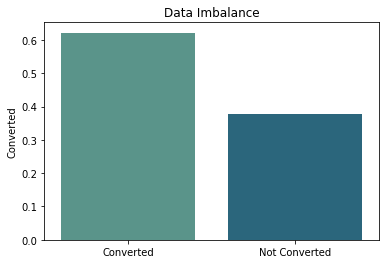

In [32]:
unbalance=pd.DataFrame(leads_df['Converted'].value_counts(normalize=True))
unbalance.index=['Converted','Not Converted']
sns.barplot(data=unbalance, x=unbalance.index, y='Converted', palette='crest')
plt.title("Data Imbalance")
plt.show()

In [33]:
round((leads_df.Converted.value_counts()/leads_df.shape[0])*100,2)

0    62.14
1    37.86
Name: Converted, dtype: float64

In [34]:
leads_df_notconverted=leads_df[leads_df['Converted']==0]
leads_df_converted=leads_df[leads_df['Converted']==1]

In [35]:
### Checking the Conversion Rate
ConversionRate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
ConversionRate

37.85541106458012

#### We have currently 37% Lead Conversion Rate in the data

##### The data has 62:38 ratio which seems to be balanced

### Univariate Analysis

#### Numerical Variables

In [36]:
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

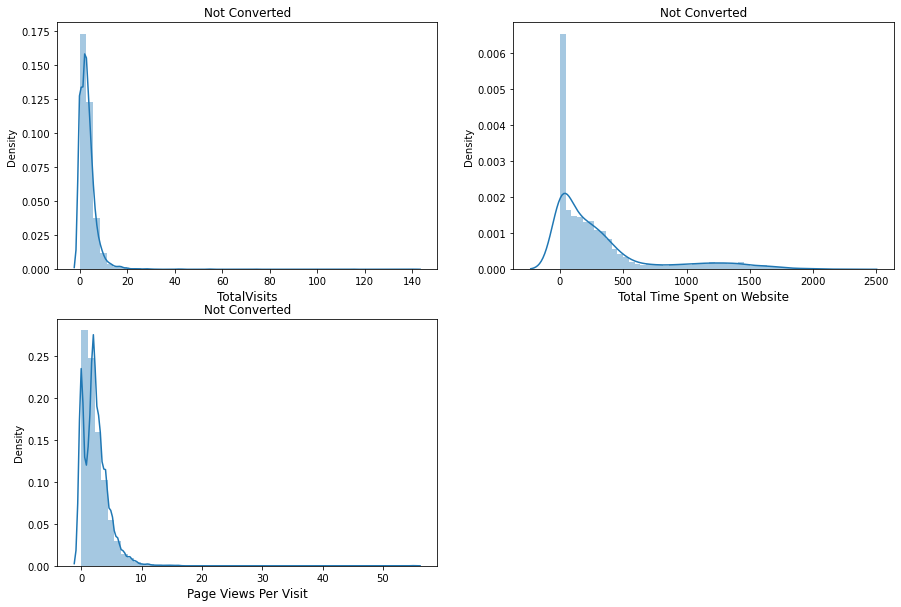

In [37]:
plt.figure(figsize=[15,10])
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    plt.title('Not Converted')
    a=sns.distplot(leads_df_notconverted[i[1]])
    a.set_xlabel(i[1], fontsize=12)

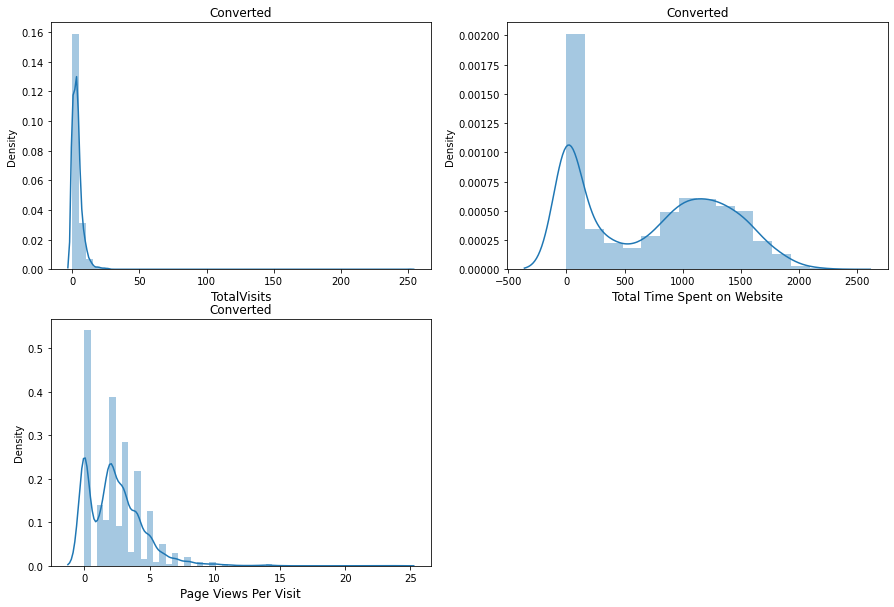

In [38]:
plt.figure(figsize=[15,10])
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    plt.title('Converted')
    a=sns.distplot(leads_df_converted[i[1]])
    a.set_xlabel(i[1], fontsize=12)

- `Total time spent on website` shows a sharp increase for leads converted as compared to not converted. This makes sense considering interested students would spend more time on the website to understand various aspects of the course such as curriculum, specializations, professors, etc.

#### Categorical Variables

In [39]:
cat_cols=[]
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            cat_cols.append(i)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

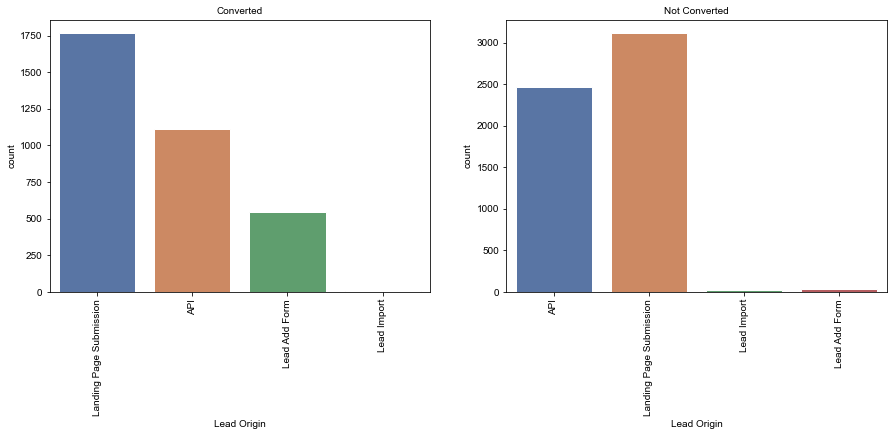

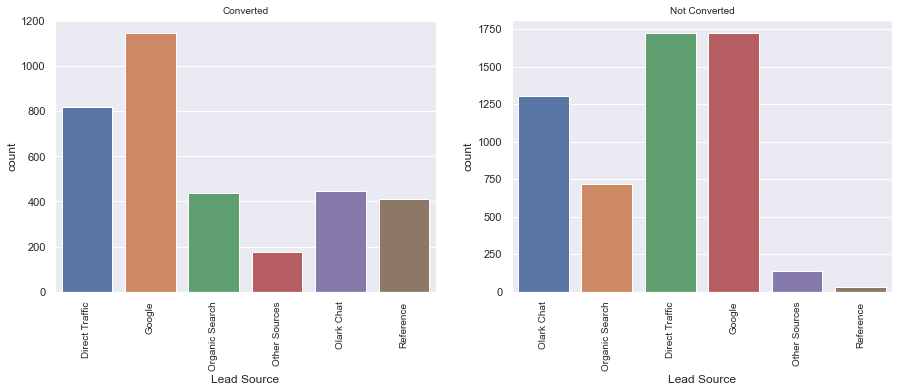

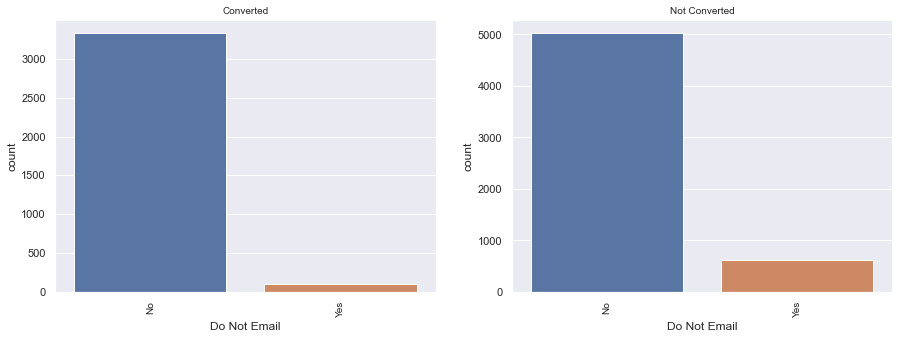

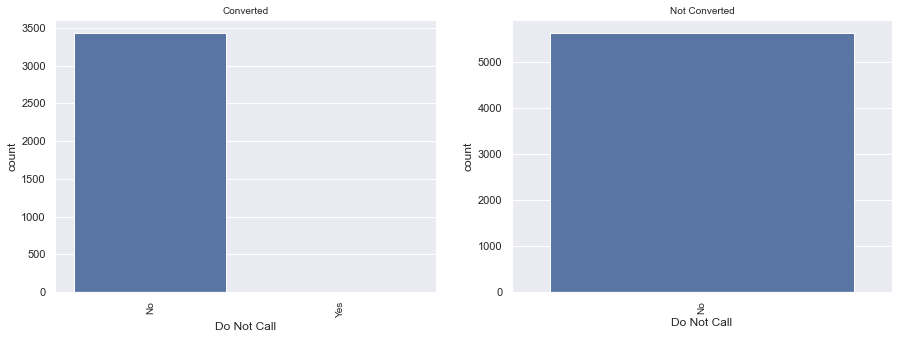

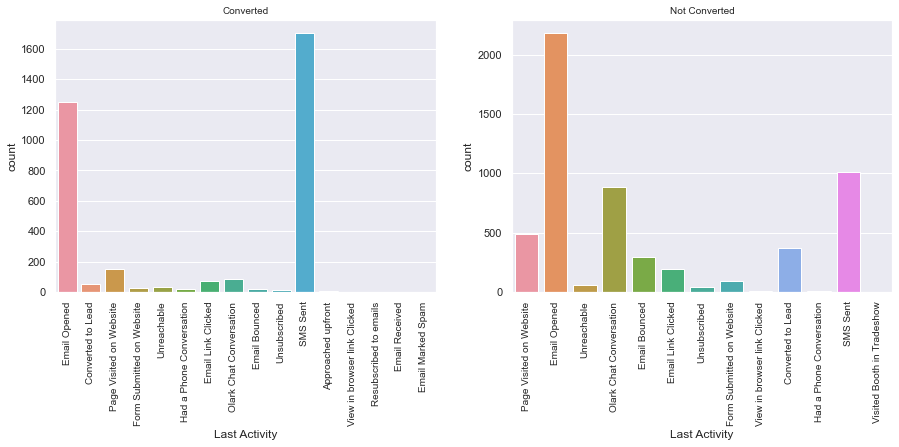

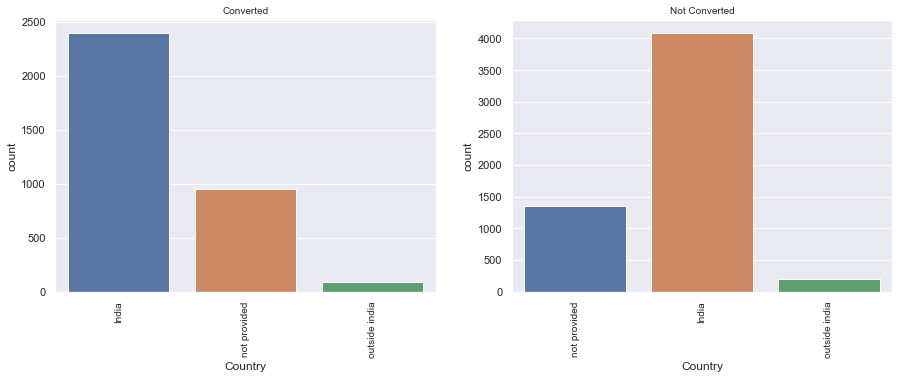

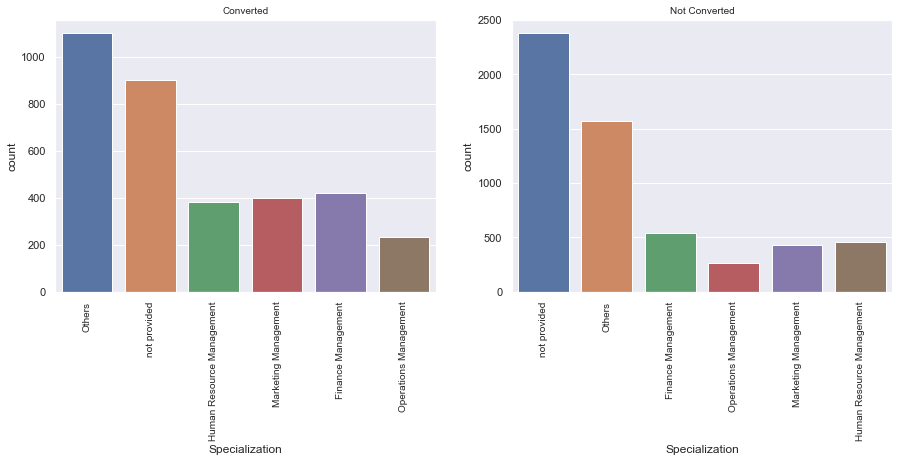

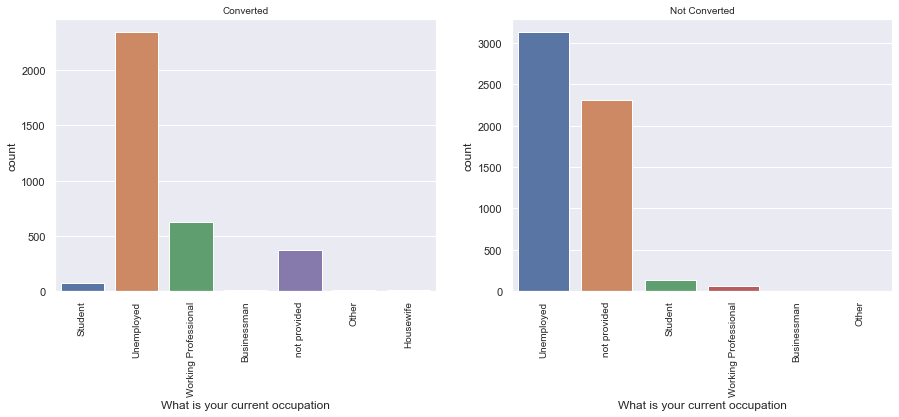

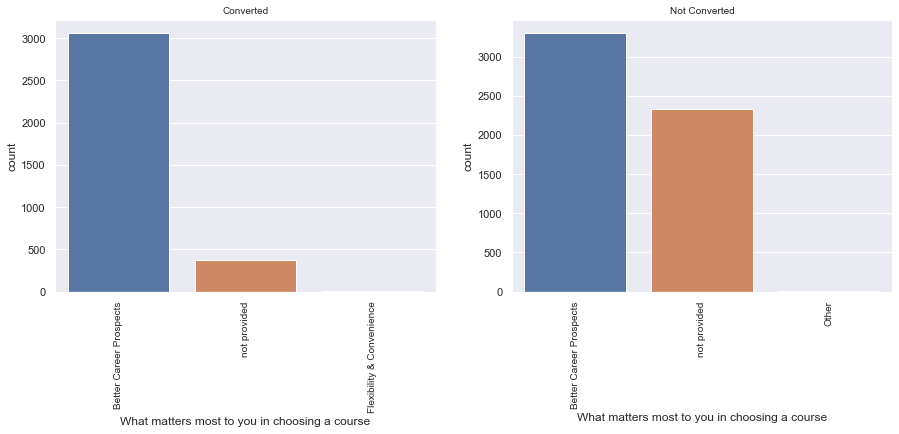

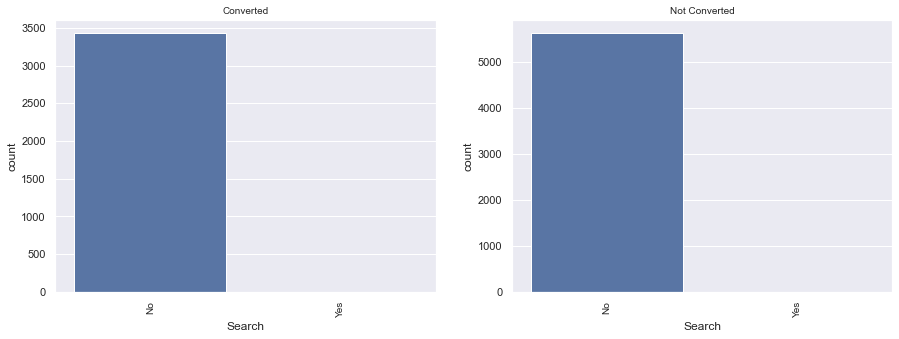

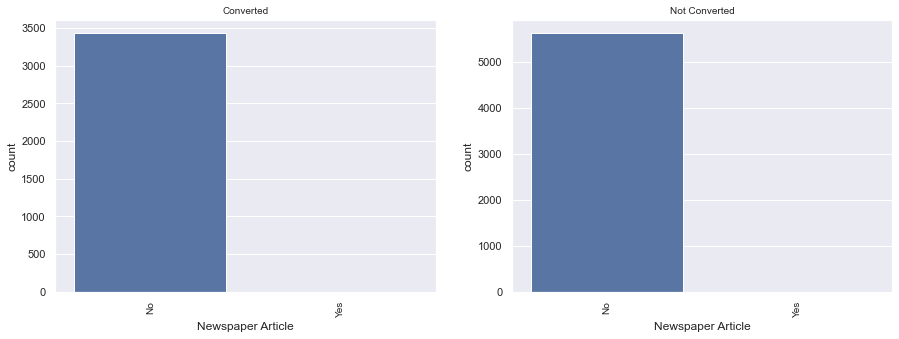

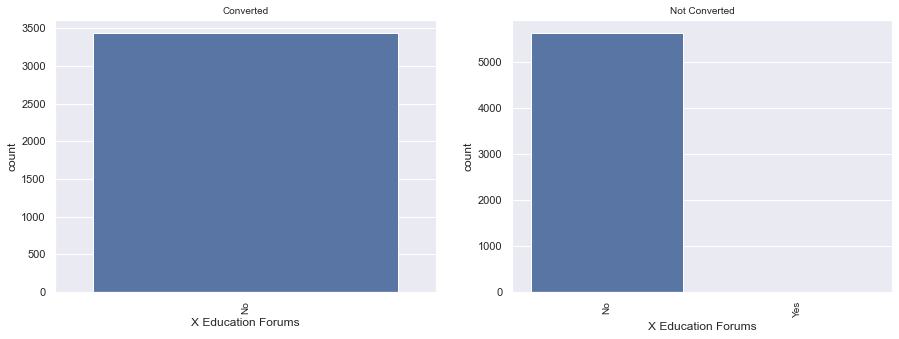

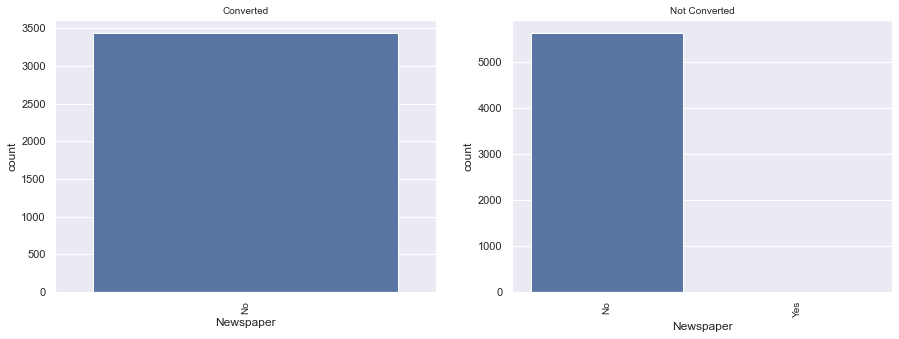

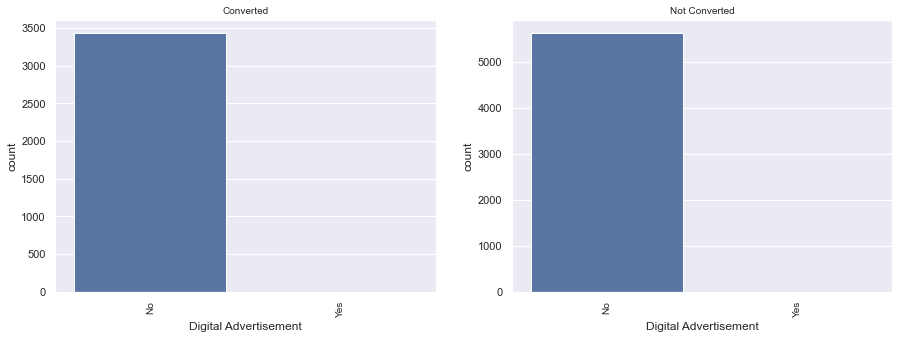

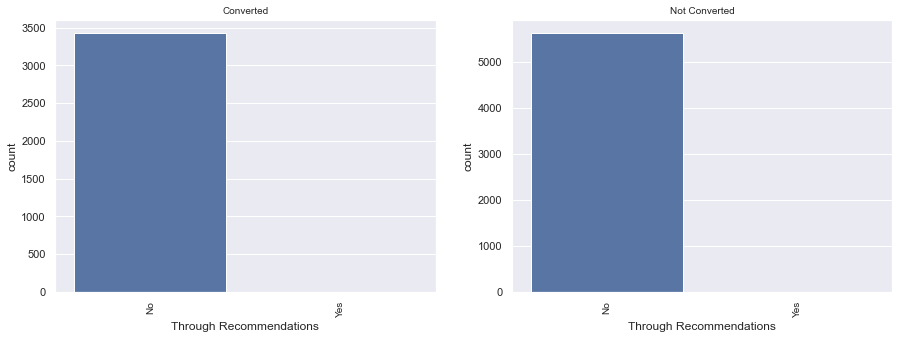

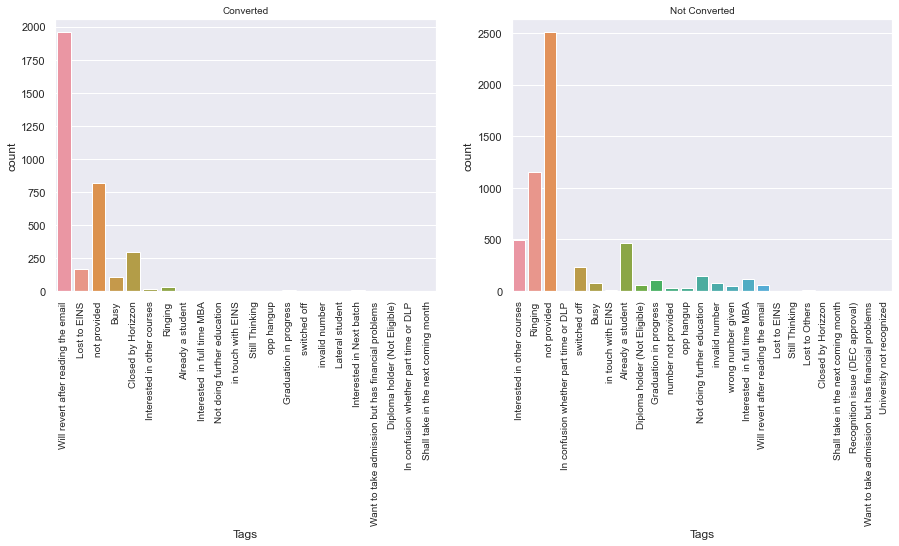

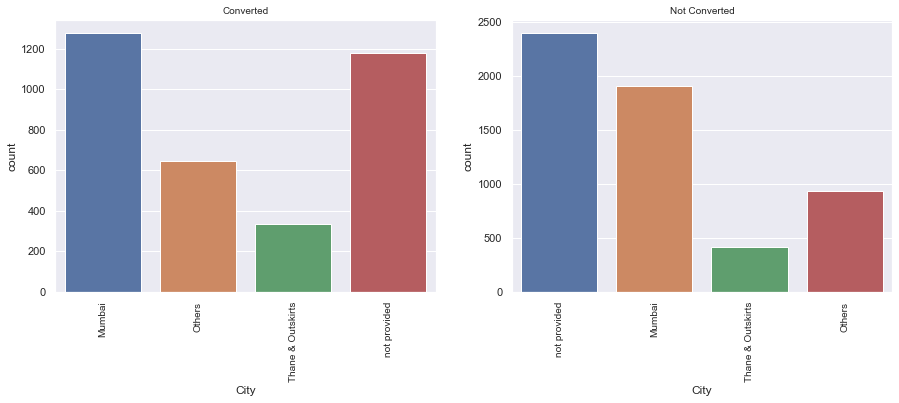

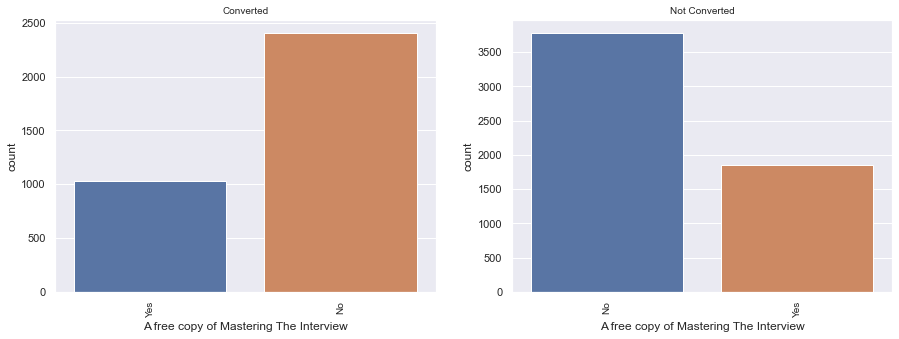

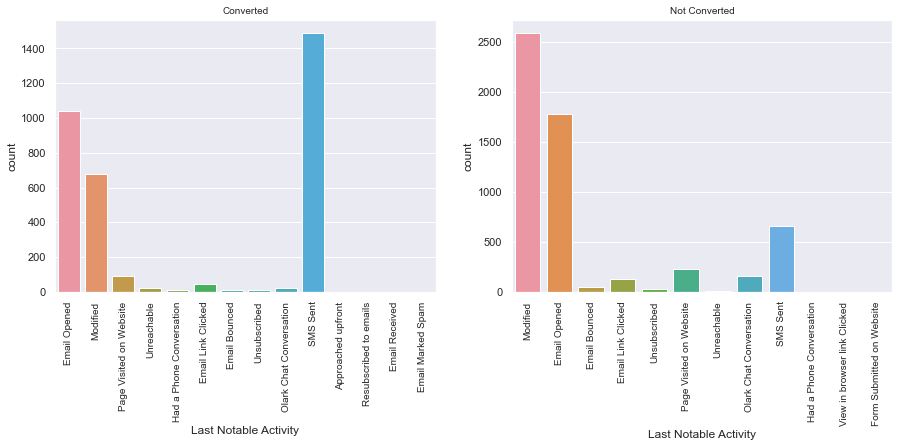

In [40]:
for i in range(len(cat_cols)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    sns.set_theme(style="darkgrid")

    ax1=sns.countplot(ax=ax1,x=cat_cols[i],data=leads_df_converted)
    ax1.set_title('Converted', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)

    ax2=sns.countplot(ax=ax2,x=cat_cols[i],data=leads_df_notconverted)
    ax2.set_title('Not Converted', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90, fontsize=10)
    plt.show()

- `Last Notable Activity`: SMS sent has the highest conversion rate.
- `Tags`: Will revert after reading the email has the highest conversion rate whereas ringing and interested in other courses indicate that the chances of lead conversion is low.
- `Current occupation`: Most number of unemployed people have been approached. But working professionals show a high conversion rate.
- `Lead Origin`: Lead Add Form shows the highest conversion rate.

### Bi-Variate Analysis

#### Continuous - Continuous Variables

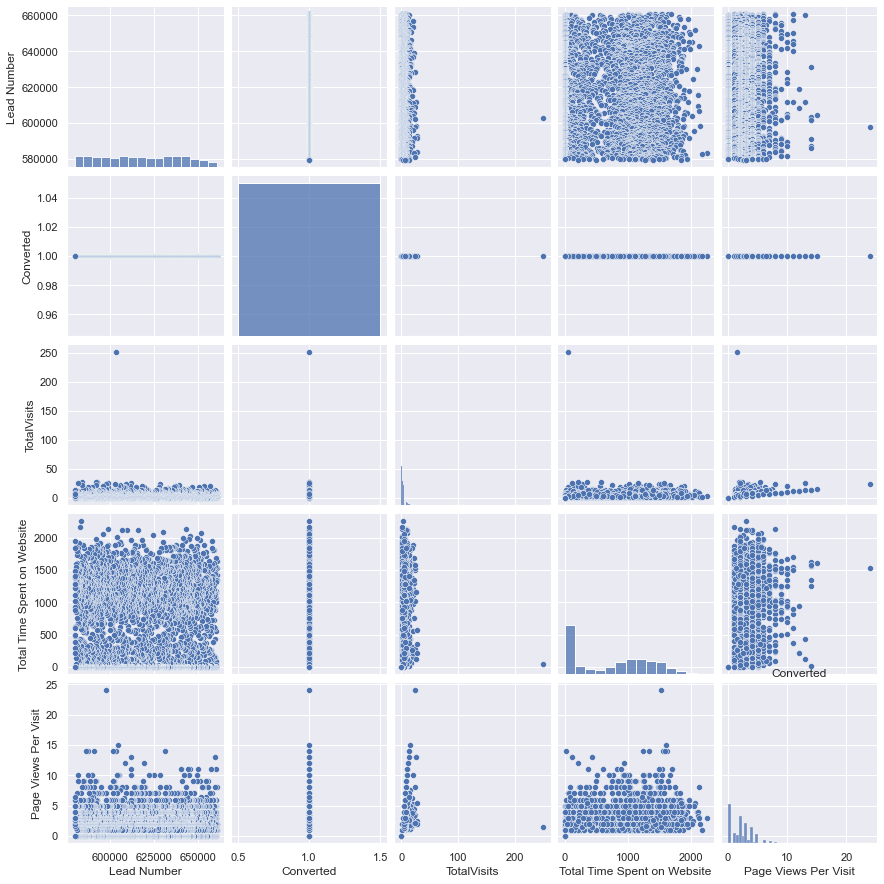

In [41]:
a=sns.pairplot(leads_df_converted)
plt.title('Converted')
plt.show()

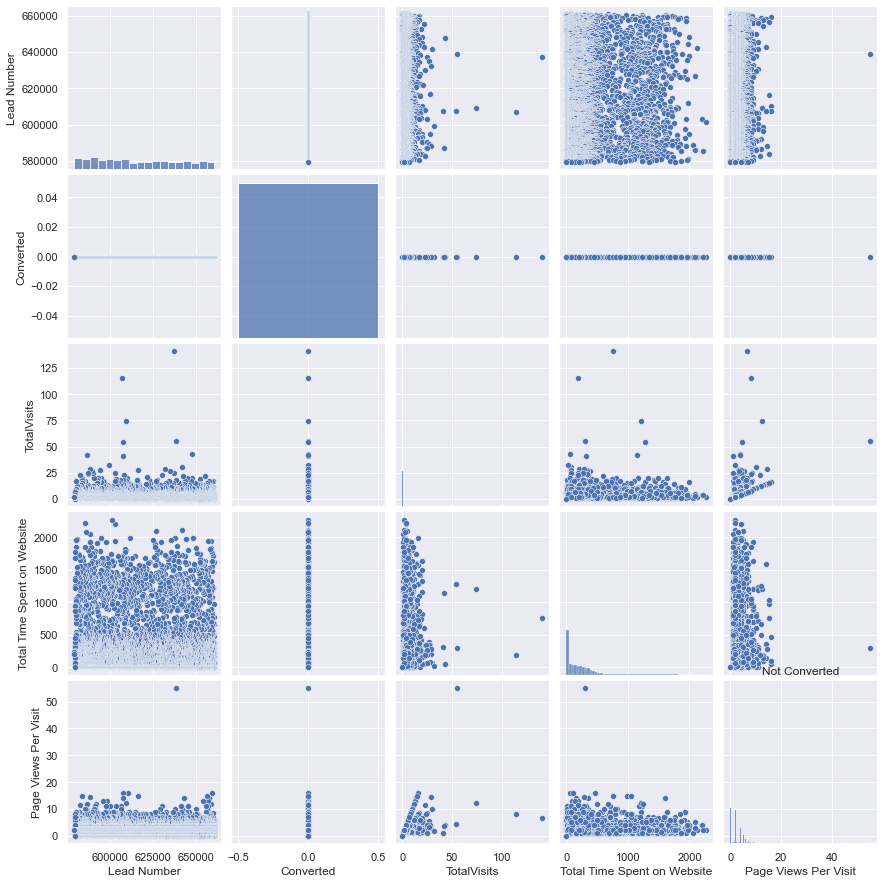

In [42]:
a=sns.pairplot(leads_df_notconverted)
plt.title('Not Converted')
plt.show()

#### Categorical - Categorical Variables

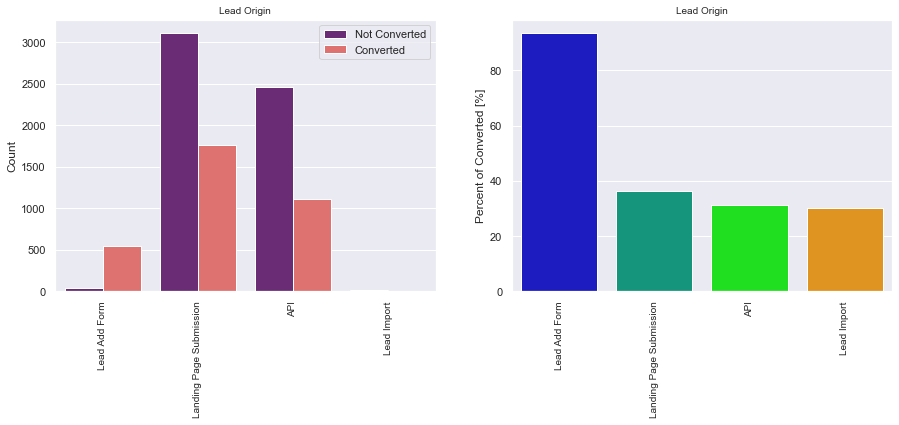

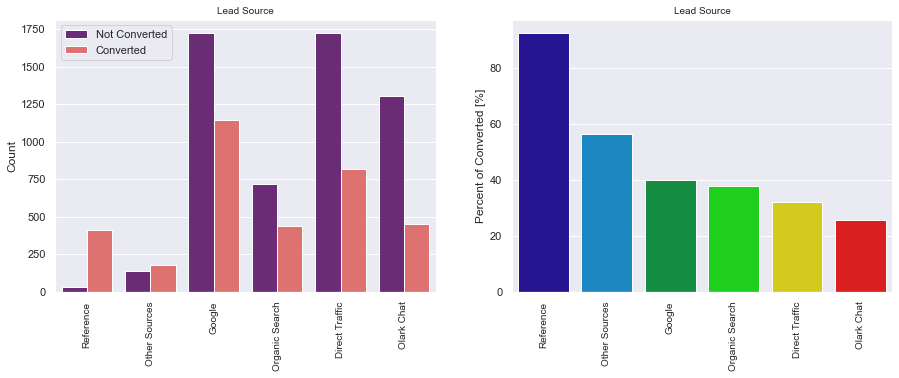

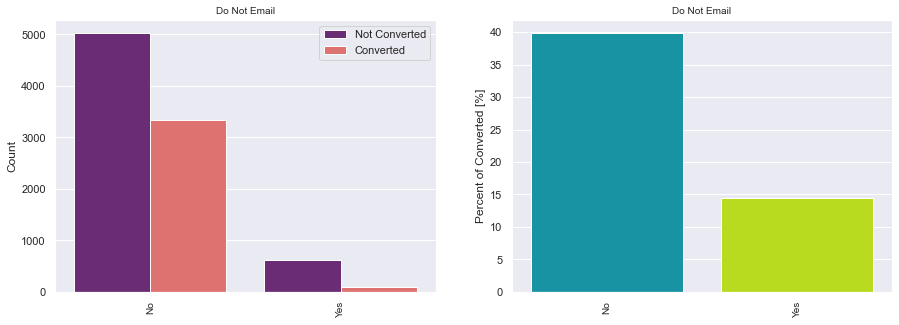

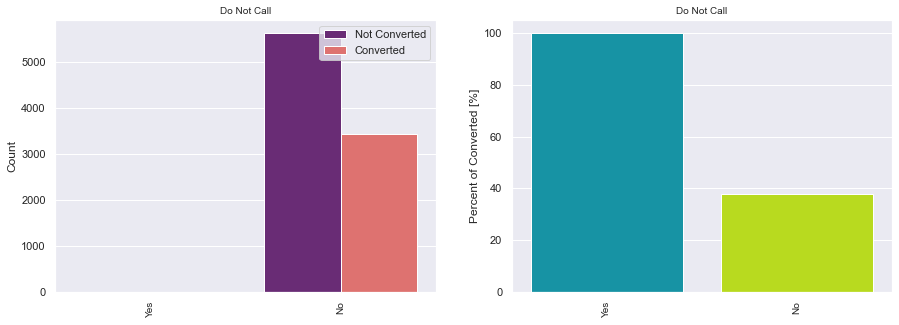

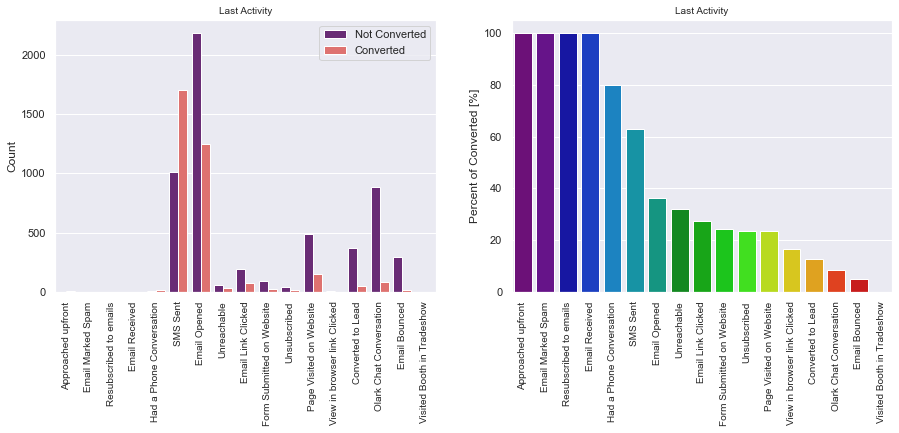

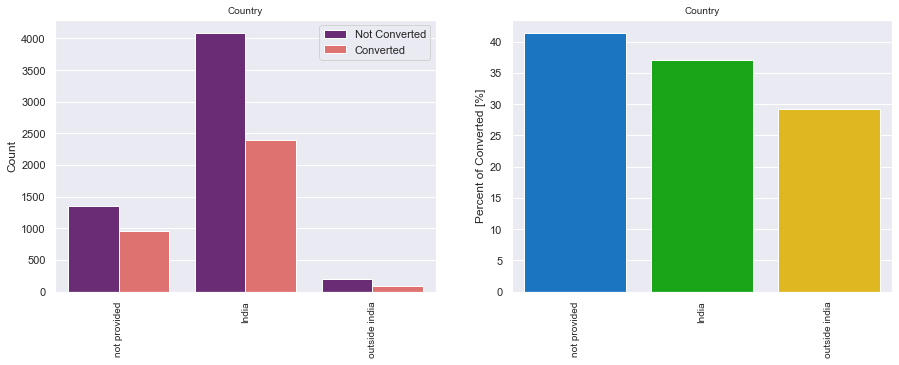

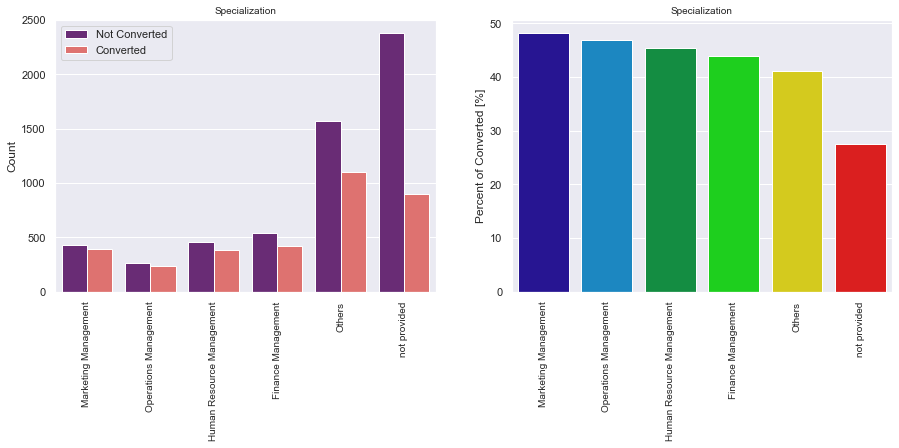

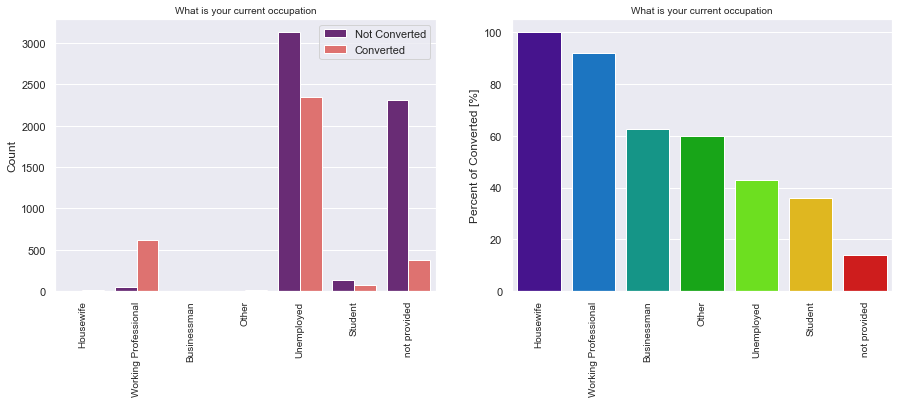

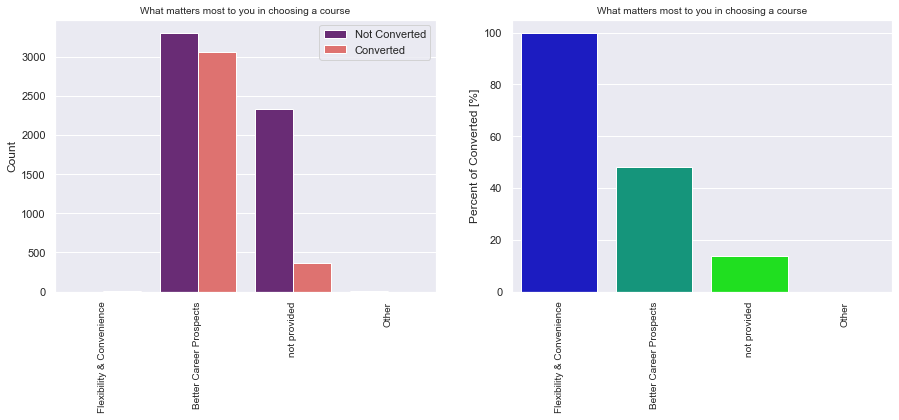

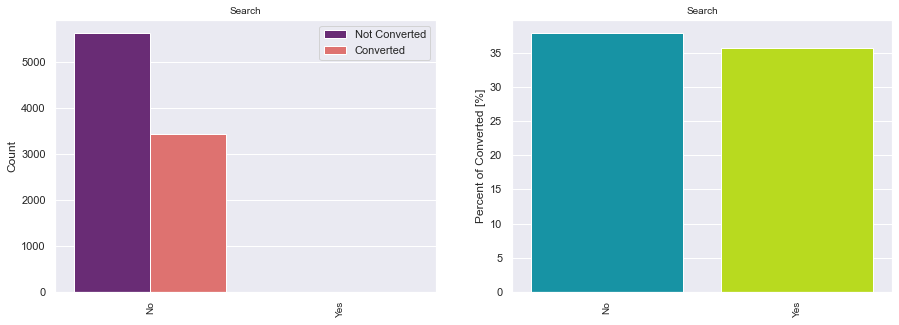

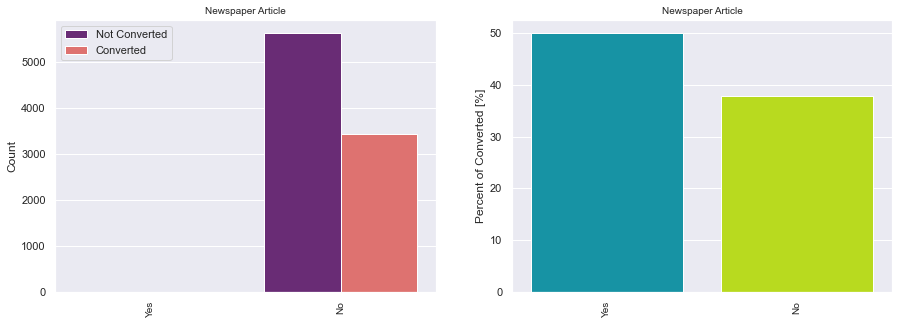

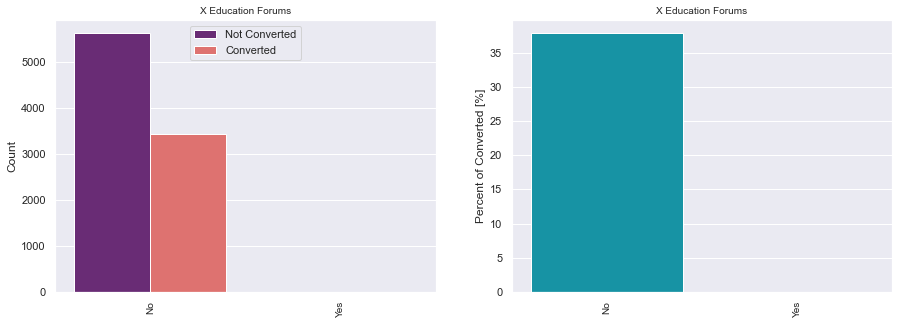

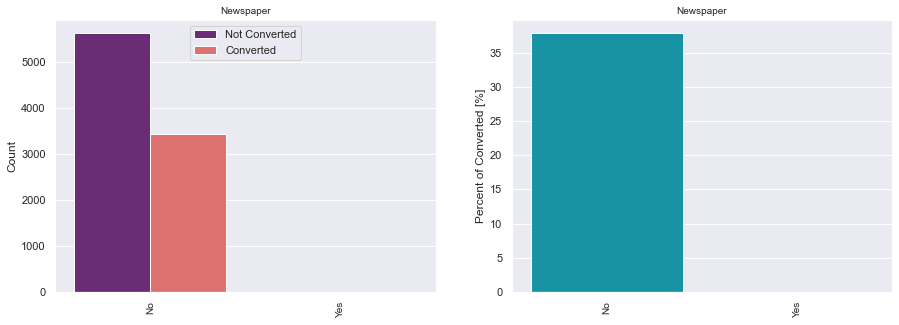

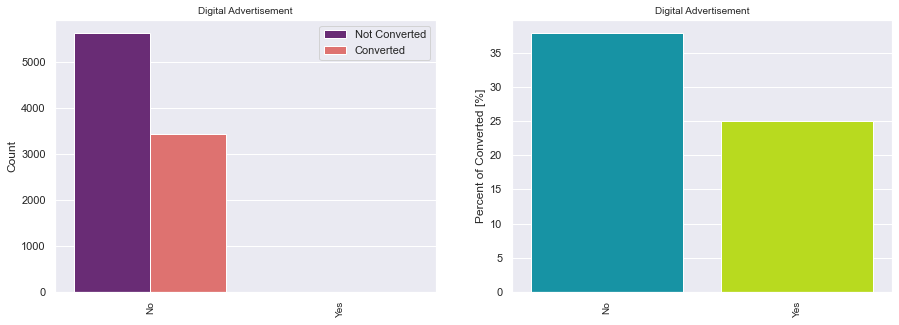

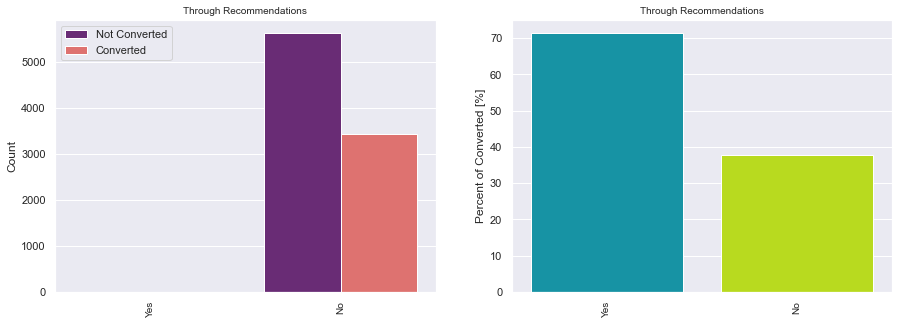

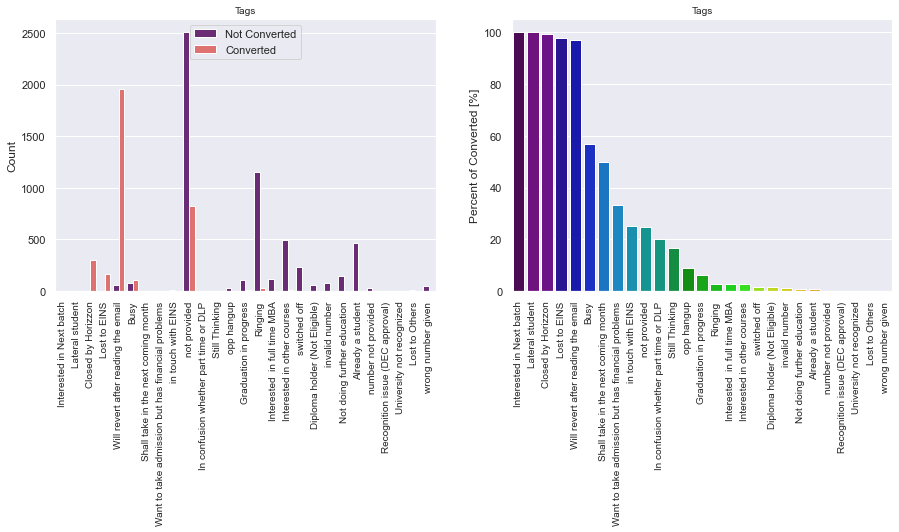

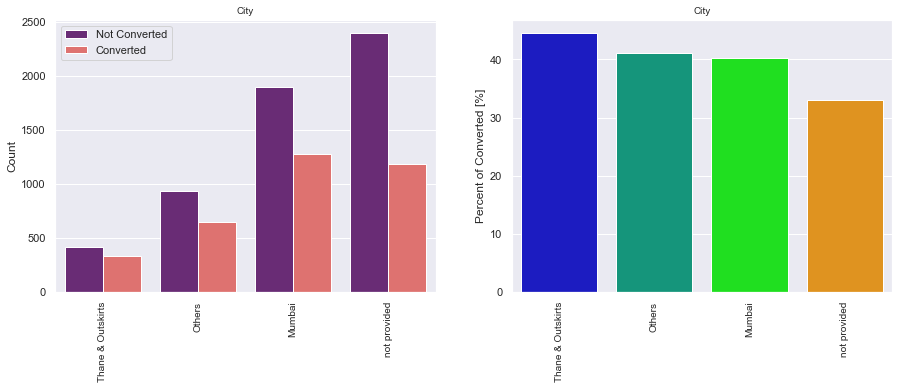

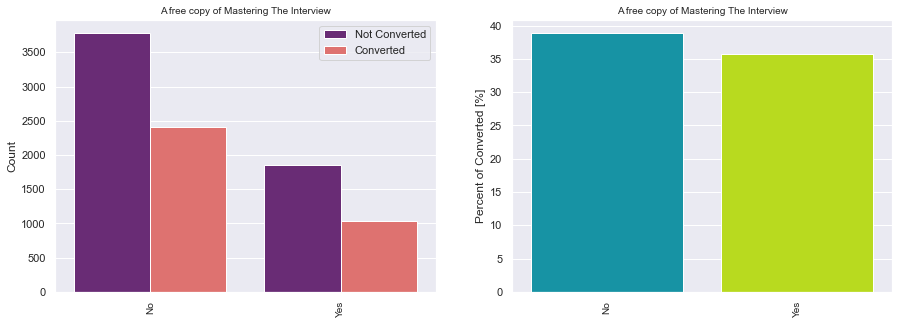

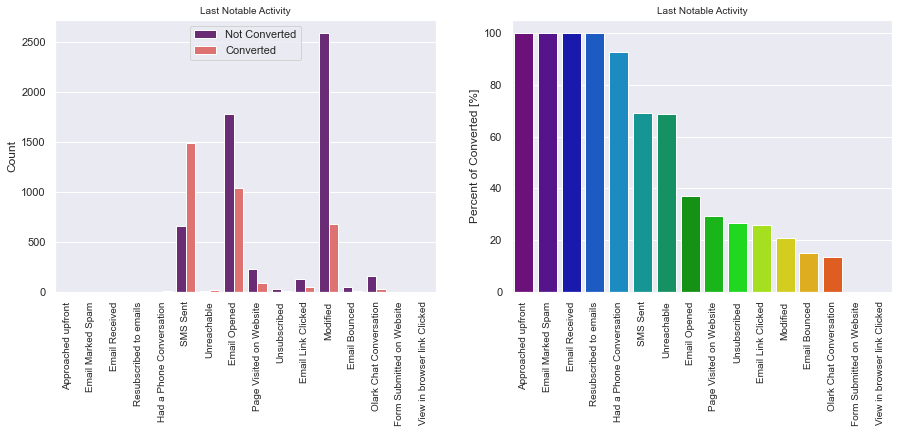

In [43]:
for i in range(len(cat_cols)):
    
    cat_perc = leads_df[[cat_cols[i], 'Converted']].groupby(cat_cols[i],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100 
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5)) 
    # 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
    ax1=sns.countplot(ax=ax1,x =cat_cols[i], 
                          data=leads_df,
                          hue ="Converted",
                          order=cat_perc[cat_cols[i]],
                          palette='magma')

    ax1.set_title(cat_cols[i], fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax1.legend(['Not Converted','Converted'])
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xlabel('')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)

    # 2. Plotting Percentage of comverted in the categorical column (WITH TARGET)
    ax2=sns.barplot(ax=ax2,x = cat_cols[i], 
                    y='Converted', 
                    order=cat_perc[cat_cols[i]], 
                    data=cat_perc,
                    palette='nipy_spectral')
    ax2.set_title(cat_cols[i], fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax2.set_ylabel('Percent of Converted [%]', fontsize=12)
    ax2.set_xlabel('')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90, fontsize=10)
    plt.show()

### Multivariate Analysis

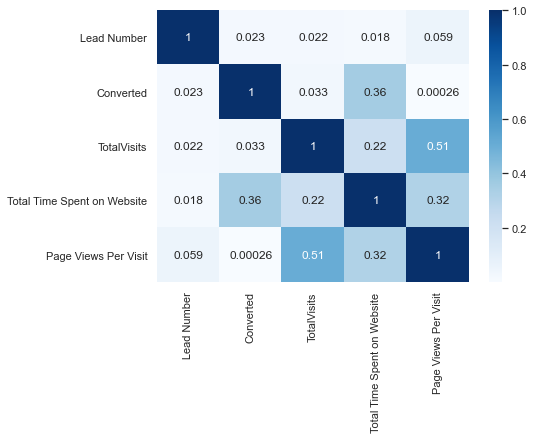

In [44]:
corr_lead=leads_df.corr()
plt.figure(figsize=[7,5])
sns.heatmap(corr_lead, annot=True, cmap='Blues')
plt.show()

# 5. Outlier Detection & Treatment

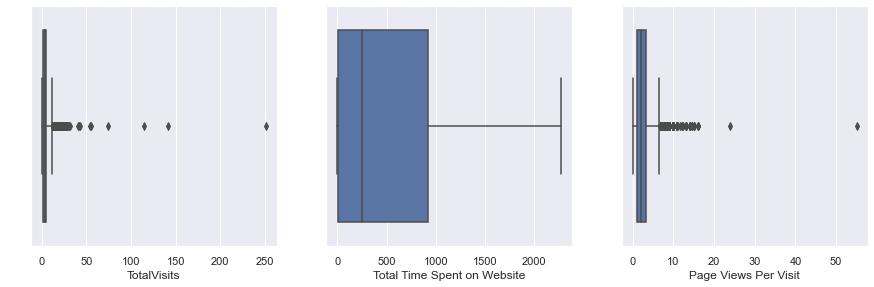

In [45]:
plt.subplots(figsize=[15,15])
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    a=sns.boxplot(data=leads_df,x=num_cols[i], orient='v')
    a.set_xlabel(num_cols[i], fontsize=12)
    a.set_ylabel(' ')

<div class="alert alert-block alert-success">
        <ul>
            <li><b>2 columns</b> with outliers identified: TotalVisits & Page Views Per Visit</li>
        </ul>
</div>

In [46]:
# Checking statistical summary of TotalVisits
round(leads_df['TotalVisits'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]),2).reset_index()

,index,TotalVisits
0,count,9074.00
1,mean,3.46
2,std,4.86
3,min,0.00
4,10%,0.00
5,25%,1.00
6,50%,3.00
7,75%,5.00
8,90%,7.00
9,95%,10.00


In [47]:
# Replacing the outlier greater than q3(95%) with Median value
leads_df.loc[leads_df['TotalVisits'] > 10, 'TotalVisits'] = 3

In [48]:
round(leads_df['Page Views Per Visit'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]),2).reset_index()

,index,Page Views Per Visit
0,count,9074.00
1,mean,2.37
2,std,2.16
3,min,0.00
4,10%,0.00
5,25%,1.00
6,50%,2.00
7,75%,3.20
8,90%,5.00
9,95%,6.00


In [49]:
# Replacing the outlier greater than Q4 (99%) with Median values
leads_df.loc[leads_df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 2

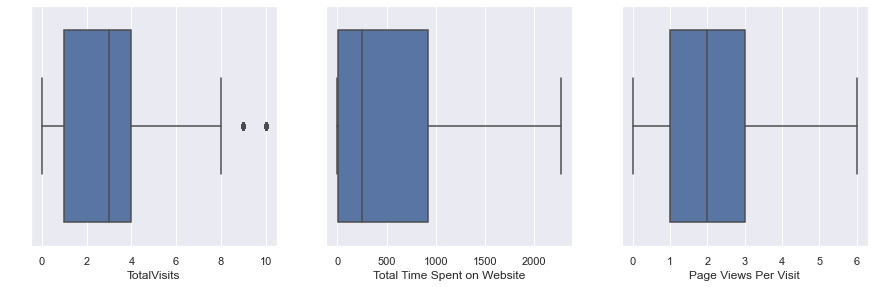

In [50]:
plt.subplots(figsize=[15,15])
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    a=sns.boxplot(data=leads_df,x=num_cols[i], orient='v')
    a.set_xlabel(num_cols[i], fontsize=12)
    a.set_ylabel(' ')

In [51]:
leads_df.shape

(9074, 24)

<div class="alert alert-block alert-success">
        <ul>
            <li> <b> Replaced the outliers with Median values for the 2 columns - TotalVisits and Page View Per Visit</li>
        </ul>
</div>

# 6. Prepare the data for modelling

### Remove Sales Team Generated Data as these variables will not be available when we create the model

<ol>
            <li> Lead Profile                                   
            <li> Lead Quality                                   
            <li> Asymmetrique Profile Score
            <li> Asymmetrique Activity Score                    
            <li> Asymmetrique Profile Index                 
            <li> Asymmetrique Activity Index                
            <li> Tags                          
            <li> Last Activity
            <li> Last Notable Activity
</ol>
<b> First 6 were removed while handling missing values. So, now we remove the last 3 columns

In [52]:
leads_df.drop(['Last Activity','Last Notable Activity','Tags'], axis=1, inplace=True)

In [53]:
cat_cols=[]
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            cat_cols.append(i)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'City',
 'A free copy of Mastering The Interview']

In [54]:
leads_df.shape

(9074, 21)

### Dummy Variables

In [55]:
dummy=pd.get_dummies(leads_df[cat_cols], drop_first=True)
dummy.shape

(9074, 36)

In [56]:
final_leads_df=pd.concat([leads_df,dummy],axis=1)
final_leads_df.shape

(9074, 57)

In [57]:
final_leads_df.drop(cat_cols,axis=1,inplace=True)
final_leads_df.shape

(9074, 41)

In [58]:
final_leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
final_leads_df.dtypes

Lead Number                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Lead Origin_Landing Page Submission                                          uint8
Lead Origin_Lead Add Form                                                    uint8
Lead Origin_Lead Import                                                      uint8
Lead Source_Google                                                           uint8
Lead Source_Olark Chat                                                       uint8
Lead Source_Organic Search                                                   uint8
Lead Source_Other Sources                                                    uint8
Lead

#### Let us check correlations

In [60]:
final_leads_df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
Lead Number,1.000000,0.022830,0.053254,0.018360,0.069465,-0.069574,0.024933,0.075668,0.139387,-0.067170,-0.018105,0.144149,0.022965,-0.098898,0.012150,-0.039544,-0.033267,-0.010292,0.000648,-0.010344,-0.032503,0.047991,-0.013876,-0.012154,-0.033655,-0.029556,-0.014346,0.052652,-0.000438,-0.013571,0.052797,-0.012663,-0.012338,-0.003121,0.004721,-0.017779,-0.005659,-0.021314,0.025293,0.039723,-0.106875
Converted,0.022830,1.000000,0.037686,0.359261,-0.000601,-0.037481,0.300775,-0.009328,0.029960,-0.124085,-0.000581,0.071606,0.255480,-0.140786,0.019024,0.042772,-0.031996,0.049586,0.067607,0.044953,0.044230,-0.161448,0.040372,0.018578,-0.006074,0.126822,0.316246,-0.321473,0.013451,-0.008194,-0.324391,-0.001735,0.003718,-0.008194,-0.008194,-0.005566,0.019233,0.029993,0.041365,-0.081064,-0.030860
TotalVisits,0.053254,0.037686,1.000000,0.365384,0.698593,0.479262,-0.293810,-0.063144,0.262793,-0.533653,0.276111,-0.059102,-0.253906,-0.007500,0.009698,-0.658028,0.046085,0.094961,0.062835,0.065359,0.236773,-0.417060,-0.006187,0.028259,-0.027955,0.075372,-0.004426,-0.071174,-0.012667,-0.008328,-0.072371,0.034958,0.018902,0.000349,0.030720,0.015886,0.033732,0.155752,0.090905,-0.451256,0.281821
Total Time Spent on Website,0.018360,0.359261,0.365384,1.000000,0.376145,0.292571,-0.188526,-0.050742,0.215390,-0.378626,0.100986,-0.068126,-0.162919,-0.046192,0.007029,-0.469866,0.028455,0.067162,0.068158,0.062165,0.145476,-0.296604,0.006903,0.031444,-0.012423,0.085600,0.096820,-0.147569,-0.009298,-0.000864,-0.147564,0.013181,0.011618,0.006376,0.025592,0.007900,0.023761,0.109812,0.076813,-0.300300,0.177435
Page Views Per Visit,0.069465,-0.000601,0.698593,0.376145,1.000000,0.562037,-0.316512,-0.072446,0.308452,-0.591539,0.249185,-0.075219,-0.274590,0.011569,-0.005558,-0.710345,0.053054,0.101020,0.073540,0.073603,0.261853,-0.463512,-0.005320,0.012912,-0.036610,0.099092,-0.008859,-0.089646,-0.013637,-0.007166,-0.090954,0.022013,0.001307,0.002542,0.007913,0.009939,0.001466,0.177760,0.099105,-0.500744,0.273838
Lead Origin_Landing Page Submission,-0.069574,-0.037481,0.479262,0.292571,0.562037,1.000000,-0.282445,-0.062195,0.078455,-0.528424,0.050919,-0.149604,-0.244652,0.099661,-0.016034,-0.610205,0.094095,0.156915,0.132351,0.125445,0.413826,-0.755381,0.001087,0.005032,0.000148,0.093087,-0.002073,-0.098044,-0.011337,0.009722,-0.093604,0.019505,0.013749,0.009722,0.009722,0.019447,0.017768,0.312120,0.154552,-0.818230,0.564863
Lead Origin_Lead Add Form,0.024933,0.300775,-0.293810,-0.188526,-0.316512,-0.282445,1.000000,-0.015064,-0.176836,-0.125706,-0.099838,0.283579,0.866191,-0.031468,0.026442,0.421431,-0.044697,0.033304,0.031828,-0.011751,-0.060445,0.016730,0.034663,-0.010643,0.008493,0.050962,0.191290,-0.169466,-0.002746,-0.002746,-0.170319,-0.010282,-0.003883,-0.002746,-0.002746,-0.005493,-

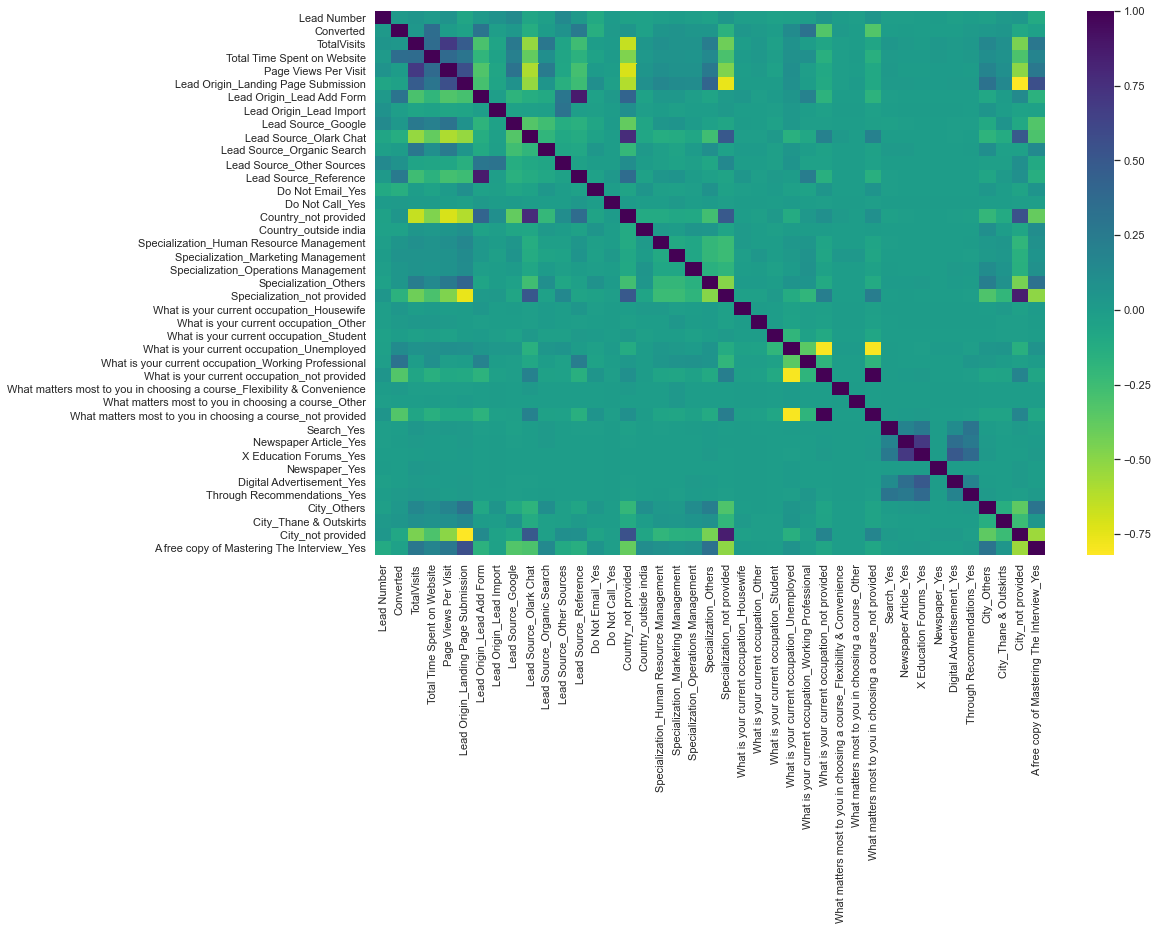

In [61]:
plt.figure(figsize=[15,10])
sns.heatmap(final_leads_df.corr(), cmap='viridis_r')
plt.show()

### Test-Train Split

In [62]:
# Putting feature variable to X
X = final_leads_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# Putting response variable to y
y = final_leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [65]:
X_train.shape

(6351, 39)

In [66]:
X_test.shape

(2723, 39)

### Feature Scaling

In [67]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [68]:
# Instantiate
scaler = StandardScaler()

# Fit_Transform
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
3009,-0.385477,-0.160255,-0.076507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1012,-0.385477,-0.540048,-0.076507,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9226,-1.206045,-0.888650,-1.295721,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4750,-0.385477,1.643304,-0.076507,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
7987,0.845375,2.017593,0.228296,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


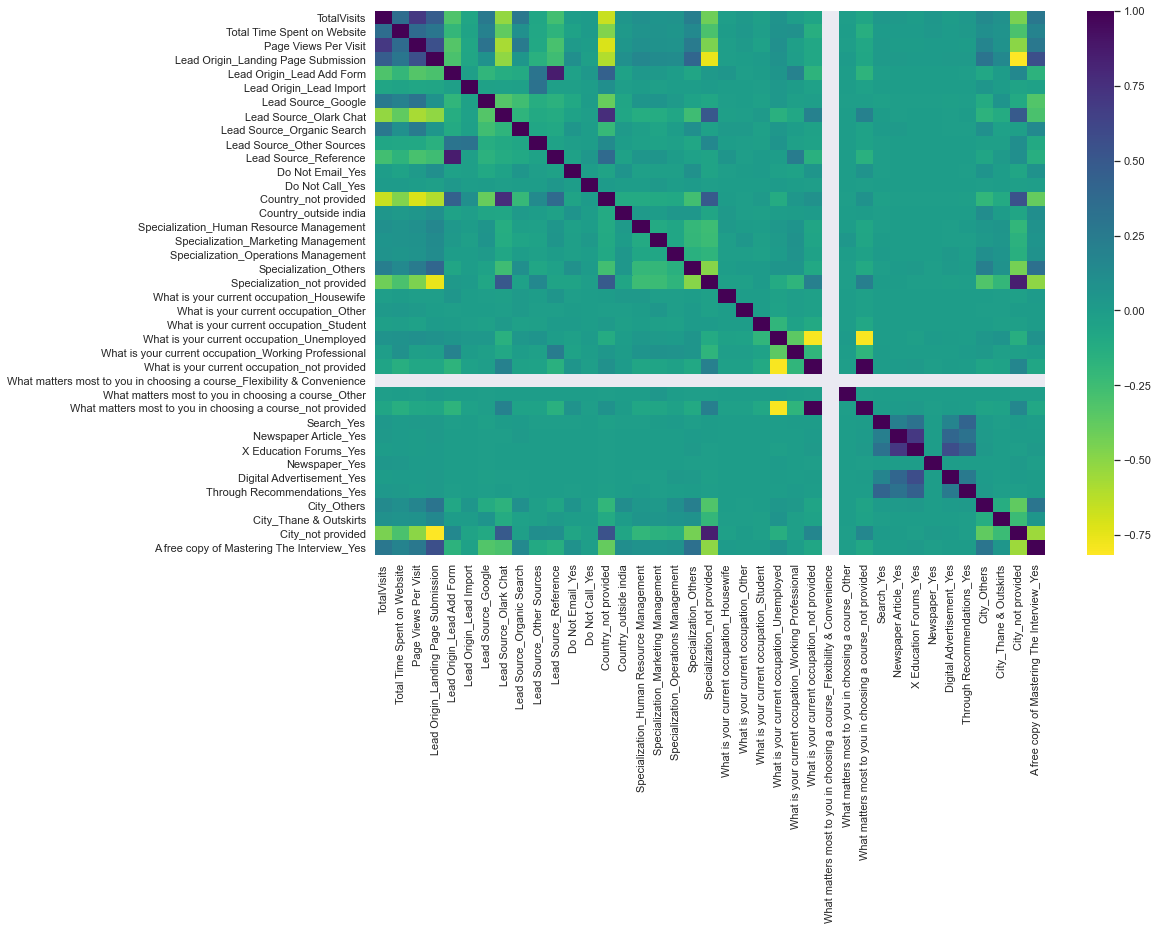

In [69]:
# Recheck correlation matrix for train data post scaling

plt.figure(figsize=[15,10])
sns.heatmap(X_train.corr(), cmap='viridis_r')
plt.show()

# 7. Modelling

### Feature Selection using RFE

In [70]:
logreg = LogisticRegression()

In [71]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other Sources', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 11),
 ('Country_not provided', True, 1),
 ('Country_outside india', False, 19),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_Marketing Management', False, 7),
 ('Specialization_Operations Management', False, 17),
 ('Specialization_Others', False, 15),
 ('Specialization_not provided', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your

In [73]:
columns=X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_] ## These below columns are eliminated

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Organic Search', 'Lead Source_Other Sources', 'Do Not Call_Yes', 'Country_outside india', 'Specialization_Human Resource Management', 'Specialization_Marketing Management', 'Specialization_Operations Management', 'Specialization_Others', 'What matters most to you in choosing a course_Flexibility & Convenience', 'What matters most to you in choosing a course_Other', 'Search_Yes', 'X Education Forums_Yes', 'Digital Advertisement_Yes', 'Through Recommendations_Yes', 'City_Others', 'City_Thane & Outskirts', 'A free copy of Mastering The Interview_Yes'], dtype='object')

### Model Building with StatsModels

#### Creating functions for calculating VIF and Building Model

In [75]:
def check_VIF(X):
    X.drop('const', axis=1, inplace=True)
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [76]:
def build_model(X,y):
    X=sm.add_constant(X) #Add constant
    logm2=sm.GLM(y,X, family = sm.families.Binomial()) #fit model
    res = logm2.fit() #fit model
    print(res.summary()) #print summary
    return X      #return the X dataframe

#### Building Model 1

In [77]:
X_train_sm1 = build_model(X_train[columns],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.8
Date:                Wed, 14 Jul 2021   Deviance:                       5589.5
Time:                        18:51:44   Pearson chi2:                 6.62e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [78]:
check_VIF(X_train_sm1)

,Features,VIF
15,What is your current occupation_not provided,147.83
16,What matters most to you in choosing a course_...,146.76
8,Country_not provided,15.79
5,Lead Source_Olark Chat,12.15
13,What is your current occupation_Unemployed,11.79
1,Lead Origin_Landing Page Submission,9.69
19,City_not provided,8.93
2,Lead Origin_Lead Add Form,8.19
9,Specialization_not provided,7.83
6,Lead Source_Reference,4.37


In [79]:
columns=columns.drop('What is your current occupation_not provided',1)

#### Building Model 2

In [80]:
X_train_sm2 = build_model(X_train[columns],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.1
Date:                Wed, 14 Jul 2021   Deviance:                       5590.3
Time:                        18:51:44   Pearson chi2:                 6.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [81]:
check_VIF(X_train_sm2)

,Features,VIF
8,Country_not provided,15.79
5,Lead Source_Olark Chat,12.11
13,What is your current occupation_Unemployed,11.62
1,Lead Origin_Landing Page Submission,9.57
18,City_not provided,8.57
2,Lead Origin_Lead Add Form,8.18
9,Specialization_not provided,7.68
15,What matters most to you in choosing a course_...,6.90
6,Lead Source_Reference,4.37
14,What is your current occupation_Working Profes...,2.35


In [82]:
columns=columns.drop('Country_not provided',1)

#### Building Model 3

In [83]:
X_train_sm3=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.3
Date:                Wed, 14 Jul 2021   Deviance:                       5602.7
Time:                        18:51:44   Pearson chi2:                 6.65e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [84]:
check_VIF(X_train_sm3)

,Features,VIF
12,What is your current occupation_Unemployed,11.24
1,Lead Origin_Landing Page Submission,9.18
17,City_not provided,8.40
8,Specialization_not provided,7.58
14,What matters most to you in choosing a course_...,6.69
2,Lead Origin_Lead Add Form,4.64
6,Lead Source_Reference,4.35
5,Lead Source_Olark Chat,2.58
13,What is your current occupation_Working Profes...,2.32
4,Lead Source_Google,1.89


In [85]:
columns=columns.drop('Newspaper_Yes',1)

#### Building Model 4

In [86]:
X_train_sm4=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.0
Date:                Wed, 14 Jul 2021   Deviance:                       5606.1
Time:                        18:51:45   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [87]:
check_VIF(X_train_sm4)

,Features,VIF
12,What is your current occupation_Unemployed,11.23
1,Lead Origin_Landing Page Submission,9.18
16,City_not provided,8.37
8,Specialization_not provided,7.57
14,What matters most to you in choosing a course_...,6.69
2,Lead Origin_Lead Add Form,4.64
6,Lead Source_Reference,4.35
5,Lead Source_Olark Chat,2.58
13,What is your current occupation_Working Profes...,2.32
4,Lead Source_Google,1.89


In [88]:
columns=columns.drop('Newspaper Article_Yes',1)

#### Building Model 5

In [89]:
X_train_sm5=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.3
Date:                Wed, 14 Jul 2021   Deviance:                       5606.7
Time:                        18:51:45   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [90]:
check_VIF(X_train_sm5)

,Features,VIF
12,What is your current occupation_Unemployed,11.23
1,Lead Origin_Landing Page Submission,9.17
15,City_not provided,8.37
8,Specialization_not provided,7.57
14,What matters most to you in choosing a course_...,6.69
2,Lead Origin_Lead Add Form,4.64
6,Lead Source_Reference,4.35
5,Lead Source_Olark Chat,2.58
13,What is your current occupation_Working Profes...,2.32
4,Lead Source_Google,1.89


In [91]:
columns=columns.drop('City_not provided',1)

#### Building Model 6

In [92]:
X_train_sm6=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.5
Date:                Wed, 14 Jul 2021   Deviance:                       5612.9
Time:                        18:51:45   Pearson chi2:                 6.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [93]:
check_VIF(X_train_sm6)

,Features,VIF
12,What is your current occupation_Unemployed,9.68
1,Lead Origin_Landing Page Submission,7.79
14,What matters most to you in choosing a course_...,5.87
8,Specialization_not provided,4.82
2,Lead Origin_Lead Add Form,4.64
6,Lead Source_Reference,4.34
5,Lead Source_Olark Chat,2.58
13,What is your current occupation_Working Profes...,1.91
4,Lead Source_Google,1.89
0,Total Time Spent on Website,1.32


In [94]:
columns=columns.drop('What is your current occupation_Housewife',1)

#### Building Model 7

In [95]:
X_train_sm7=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.3
Date:                Wed, 14 Jul 2021   Deviance:                       5614.6
Time:                        18:51:46   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [96]:
check_VIF(X_train_sm7)

,Features,VIF
11,What is your current occupation_Unemployed,9.59
1,Lead Origin_Landing Page Submission,7.72
13,What matters most to you in choosing a course_...,5.83
8,Specialization_not provided,4.80
2,Lead Origin_Lead Add Form,4.63
6,Lead Source_Reference,4.33
5,Lead Source_Olark Chat,2.57
12,What is your current occupation_Working Profes...,1.90
4,Lead Source_Google,1.88
0,Total Time Spent on Website,1.32


In [97]:
columns=columns.drop('What is your current occupation_Other',1)

#### Building Model 8

In [98]:
X_train_sm8=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.1
Date:                Wed, 14 Jul 2021   Deviance:                       5618.1
Time:                        18:51:46   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [99]:
check_VIF(X_train_sm8)

,Features,VIF
10,What is your current occupation_Unemployed,9.49
1,Lead Origin_Landing Page Submission,7.65
12,What matters most to you in choosing a course_...,5.77
8,Specialization_not provided,4.77
2,Lead Origin_Lead Add Form,4.63
6,Lead Source_Reference,4.33
5,Lead Source_Olark Chat,2.56
11,What is your current occupation_Working Profes...,1.89
4,Lead Source_Google,1.88
0,Total Time Spent on Website,1.31


In [100]:
columns=columns.drop('Lead Origin_Lead Import',1)

#### Building Model 9

In [101]:
X_train_sm9=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.7
Date:                Wed, 14 Jul 2021   Deviance:                       5621.5
Time:                        18:51:46   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [102]:
check_VIF(X_train_sm9)

,Features,VIF
9,What is your current occupation_Unemployed,9.21
1,Lead Origin_Landing Page Submission,7.49
11,What matters most to you in choosing a course_...,5.66
7,Specialization_not provided,4.75
2,Lead Origin_Lead Add Form,4.61
5,Lead Source_Reference,4.33
4,Lead Source_Olark Chat,2.52
3,Lead Source_Google,1.86
10,What is your current occupation_Working Profes...,1.86
8,What is your current occupation_Student,1.31


In [103]:
columns=columns.drop('What is your current occupation_Unemployed',1)

#### Building Model 10

In [104]:
X_train_sm10=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.5
Date:                Wed, 14 Jul 2021   Deviance:                       5624.9
Time:                        18:51:46   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [105]:
check_VIF(X_train_sm10)

,Features,VIF
2,Lead Origin_Lead Add Form,4.41
5,Lead Source_Reference,4.25
7,Specialization_not provided,2.39
4,Lead Source_Olark Chat,2.02
1,Lead Origin_Landing Page Submission,1.66
10,What matters most to you in choosing a course_...,1.62
3,Lead Source_Google,1.58
0,Total Time Spent on Website,1.28
9,What is your current occupation_Working Profes...,1.19
6,Do Not Email_Yes,1.12


In [106]:
columns=columns.drop('What is your current occupation_Student',1)

#### Building Model 11

In [107]:
X_train_sm11=build_model(X_train[columns], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.6
Date:                Wed, 14 Jul 2021   Deviance:                       5625.2
Time:                        18:51:46   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [108]:
check_VIF(X_train_sm11)

,Features,VIF
2,Lead Origin_Lead Add Form,4.41
5,Lead Source_Reference,4.25
7,Specialization_not provided,2.37
4,Lead Source_Olark Chat,2.01
1,Lead Origin_Landing Page Submission,1.63
9,What matters most to you in choosing a course_...,1.61
3,Lead Source_Google,1.58
0,Total Time Spent on Website,1.28
8,What is your current occupation_Working Profes...,1.18
6,Do Not Email_Yes,1.12


We notice that values of all features are in order now (meaning p-values < 0.05) and VIF less than 5. We can proceed to derive lead score and make predictions on train data.

In [109]:
X_train_sm11 = sm.add_constant(X_train_sm11)
logm11 = sm.GLM(y_train,X_train_sm11, family = sm.families.Binomial())
res = logm11.fit()
res.summary()
y_train_pred = res.predict(X_train_sm11).values.reshape(-1)

In [110]:
y_train_pred[:10]

array([0.08893454, 0.06522721, 0.30847683, 0.4205948 , 0.80380797,
       0.61150532, 0.05412405, 0.90748539, 0.90153983, 0.77428948])

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.088935,3009
1,0,0.065227,1012
2,0,0.308477,9226
3,1,0.420595,4750
4,1,0.803808,7987


In [112]:
# Creating new column 'predicted' with 1 if convert_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,0,0.088935,3009,0
1,0,0.065227,1012,0
2,0,0.308477,9226,0
3,1,0.420595,4750,0
4,1,0.803808,7987,1


In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 799 1647]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8039678790741616


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6733442354865086

In [117]:
# Let's see the specificity of our logistic regression model
TN / float(TN+FP)

0.885787451984635

<div class="alert alert-block alert-success">
    <b>After manual feature reduction using p-values and VIF for 11 iterations, with 10 variables model,the stats are as below:</b>
        <ul>
            <li>Accuracy: 80.39%  </li>
            <li>Sensitivity: 67.33% </li>
            <li>Specificity: 88.57% </li>
        </ul>
</div>

### ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

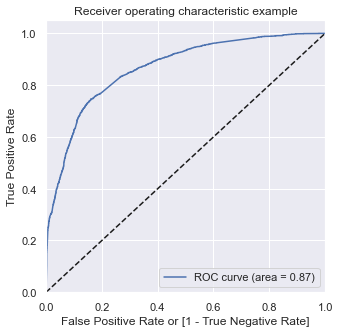

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.088935,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.065227,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.308477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.420595,4750,0,1,1,1,1,1,0,0,0,0,0
4,1,0.803808,7987,1,1,1,1,1,1,1,1,1,1,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.533617  0.982829  0.252241
0.2   0.2  0.702724  0.908013  0.574136
0.3   0.3  0.769013  0.834424  0.728041
0.4   0.4  0.805228  0.725675  0.855058
0.5   0.5  0.803968  0.673344  0.885787
0.6   0.6  0.784128  0.573998  0.915749
0.7   0.7  0.761770  0.479558  0.938540
0.8   0.8  0.737364  0.369992  0.967478
0.9   0.9  0.708550  0.256746  0.991549


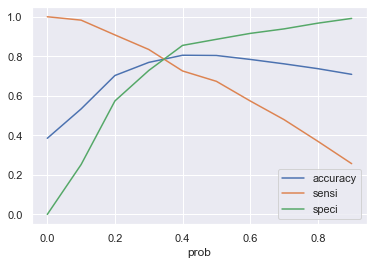

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.088935,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.065227,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.308477,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.420595,4750,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.803808,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7690127538970241

In [126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2843, 1062],
       [ 405, 2041]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity (Recall) of our logistic regression model
TP / float(TP+FN)

0.8344235486508585

In [129]:
# Let's see the specificity of our logistic regression model
TN / float(TN+FP)

0.7280409731113956

<div class="alert alert-block alert-success">
    <b>After choosing the cutt-off as 0.3, with 10 variables model,the stats are as below:</b>
        <ul>
            <li>Accuracy: 76.9%  </li>
            <li>Sensitivity: 83.44% </li>
            <li>Specificity: 72.8% </li>
        </ul>
</div>

### Make Predictions on Test

In [130]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [131]:
X_test.shape

(2723, 39)

In [132]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [133]:
X_test = X_test[columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Do Not Email_Yes,Specialization_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided
3271,-0.600595,0,0,1,0,0,0,1,0,1
1490,1.887326,1,0,0,0,0,0,0,1,0
7936,-0.752879,0,0,1,0,0,0,1,0,1
4216,-0.888650,0,1,0,0,1,0,0,0,0
3830,-0.587751,1,0,0,0,0,0,0,0,1


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

3271    0.062100
1490    0.974750
7936    0.052935
4216    0.924757
3830    0.057201
1800    0.728758
6507    0.215602
4821    0.393938
4223    0.833534
4714    0.107028
dtype: float64

In [137]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.062100
1490,0.974750
7936,0.052935
4216,0.924757
3830,0.057201


In [138]:
y_test_df = pd.DataFrame(y_test)

y_test_df['Lead Number'] = y_test_df.index # Putting Lead Number to index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.062100
1,1,1490,0.974750
2,0,7936,0.052935
3,1,4216,0.924757
4,0,3830,0.057201


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [143]:
y_pred_final

,Converted,Lead Number,Convert_Prob
0,0,3271,0.062100
1,1,1490,0.974750
2,0,7936,0.052935
3,1,4216,0.924757
4,0,3830,0.057201
...,...,...,...
2718,0,850,0.235603
2719,0,2879,0.412756
2720,1,6501,0.711368
2721,0,7155,0.110478


In [144]:
# Calculate Lead_Score
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [145]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [146]:
# rearrange columns
y_pred_final=y_pred_final[['Lead Number','Converted','Convert_Prob','Lead_Score','final_predicted']]

In [147]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,Lead_Score,final_predicted
0,3271,0,0.062100,6,0
1,1490,1,0.974750,97,1
2,7936,0,0.052935,5,0
3,4216,1,0.924757,92,1
4,3830,0,0.057201,6,0


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7686375321336761

In [149]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1273,  461],
       [ 169,  820]], dtype=int64)

In [150]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291203235591507

In [152]:
# Let's see the specificity of our logistic regression model
TN / float(TN+FP)

0.7341407151095732

<div class="alert alert-block alert-success">
    <b>After choosing the cutt-off as 0.3, with 10 variables model,the stats are as below for the test data:</b>
        <ul>
            <li>Accuracy: 76.8%  </li>
            <li>Sensitivity: 82.9% </li>
            <li>Specificity: 73.41% </li>
        </ul>
</div>